# **Introduction to PySpark**

## **What is Apache Spark?**

Before Introducing PySpark, let's discuss what is Apache Spark. 

As per the documentation, *Apache Spark™ is a unified analytics engine for large-scale data processing.* 

In simple terms what Spark does is it facilitates the process of processing big data by running them on several cores. It can process data from a variety of data repositories, including the Hadoop Distributed File System (HDFS), NoSQL databases and relational data stores, such as Apache Hive. Spark supports in-memory processing to boost the performance of big data analytics applications, but it can also perform conventional disk-based processing when data sets are too large to fit into the available system memory.

### **Introduction to RDDs**

Resilient Distributed Datasets (RDD) is a fundamental data structure of Spark. It is an immutable distributed collection of objects. Each dataset in RDD is divided into logical partitions, which may be computed on different nodes of the cluster. RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.

Formally, an RDD is a read-only, partitioned collection of records.

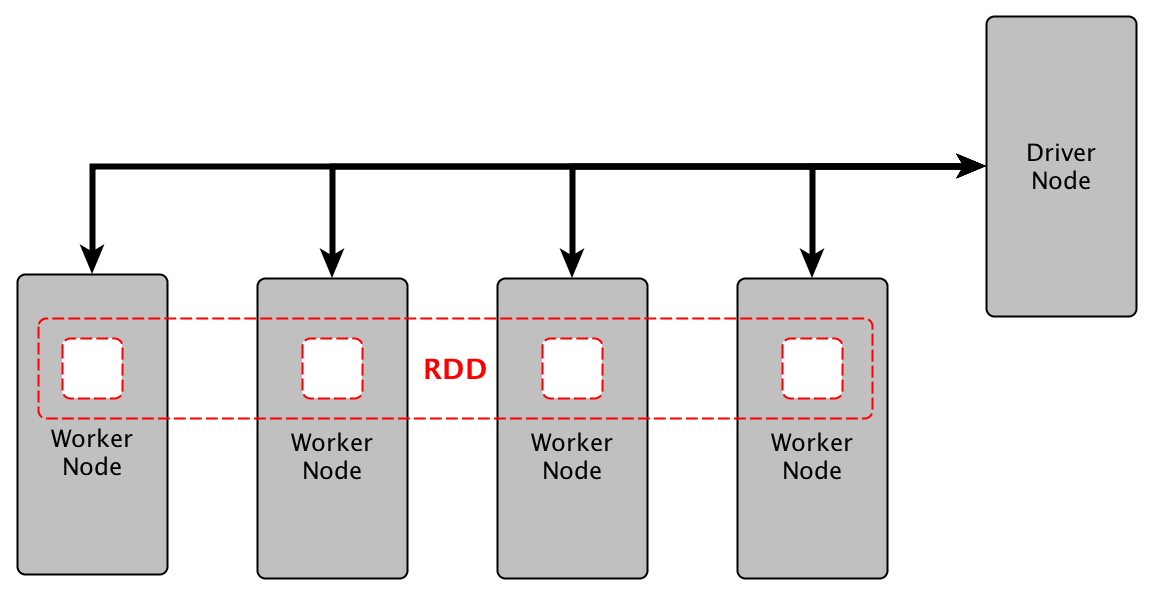

#### **Actions and Transformations**

Two types of Apache Spark RDD operations are- Transformations and Actions. A Transformation is a function that produces new RDD from the existing RDDs but when we want to work with the actual dataset, at that point Action is performed

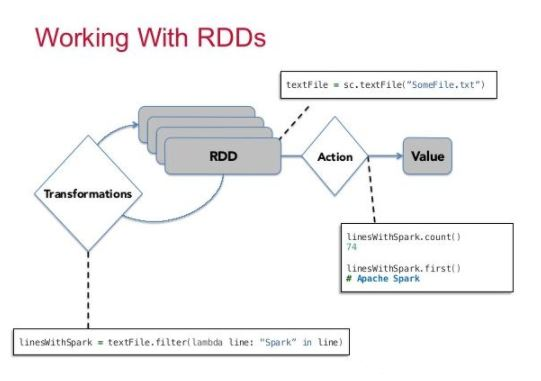

Below is a table that demonstrates the functions that apply transformations, and those which perform actions.

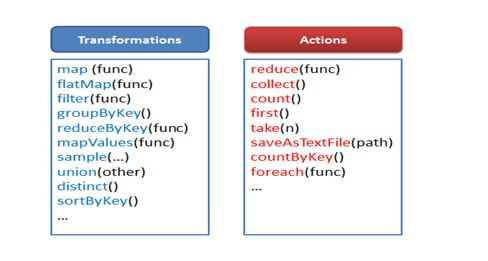

## **What is PySpark?**

PySpark is an API developed and released by the Apache Spark foundation.  The intent is to facilitate Python programmers to work in Spark.

PySpark is a great language for performing exploratory data analysis at scale, building machine learning pipelines, and creating ETLs for a data platform. If you’re already familiar with Python and libraries such as Pandas, then PySpark is a great language to learn in order to create more scalable analyses and pipelines.

## **Apache Spark and PySpark Installations**

The below cells install the required files that will allow us to run PySpark code on Apache Spark

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Get:12 http://security.ubuntu.com/ubu

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init() 

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 198 kB 54.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=82dbcc5f3ac46f0f4417ff361c9cccd97b397fb5d29e0035fdd374d96048cc83
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


To work on data using Apache Spark, we first need to instantiate a spark session, this session is going to interact with the Spark Context to manage the data processing.

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").appName("word count").getOrCreate()  # use all cores of your CPU - each core has thread

In [ ]:
#no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:  1


In [ ]:
#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

Thread(s) per core:  2


## **PySpark Hello World**

The below line of code reads a text file and stores it in an RDD

In [32]:
lines = spark.sparkContext.textFile("word_count.text")

In [33]:
type(lines)

pyspark.rdd.RDD

In [34]:
counts = lines.flatMap(lambda line: line.split(" ")).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

In [35]:
output = counts.collect() # returns a list with all the rows
for (word, count) in output:
    print("%s: %i" % (word, count))

The: 10
of: 33
New: 20
begins: 1
around: 4
BC,: 1
when: 1
Americans: 1
1100: 1
native: 1
cultures,: 1
Iroquoian: 1
European: 2
was: 8
led: 2
in: 21
1524: 1
claim: 1
came: 2
Dutch.: 1
Netherland,: 1
colony: 2
trade: 3
eventually: 1
an: 1
resource: 1
thanks: 1
patroon: 1
1626: 1
bought: 1
Manhattan: 1
Americans.[1]: 1
renamed: 1
after: 1
Duke: 1
II: 2
18th: 1
as: 4
major: 3
Colonies.: 1
: 7
played: 1
during: 3
American: 3
subsequent: 1
war.: 2
Act: 1
Congress: 1
Colonies: 1
form: 1
unified: 1
response: 1
policies.: 1
Liberty: 2
active: 1
challenge: 1
authority.: 1
loss: 1
at: 2
Long: 1
series: 1
additional: 1
defeats: 1
forced: 1
retreat: 1
area,: 1
strategic: 1
navy: 1
North: 1
operations: 1
rest: 1
Saratoga: 1
point: 2
Americans,: 1
convincing: 1
France: 1
formally: 1
them.: 1
strongly: 1
United: 4
States: 3
Constitution.: 2
where: 1
Bill: 1
Rights: 1
permanent: 1
state: 5
eleventh: 1
significant: 2
transportation: 2
19th: 2
line: 1
1825,: 1
service: 2
1831.: 1
These: 1
Great: 3
Lakes.

Usually, `collect()` is used to retrieve the action output when you have very small result set and calling `collect()` on an RDD/DataFrame with a bigger result set causes out of memory as it returns the entire dataset (from all workers) to the driver hence we should avoid calling `collect()` on a larger dataset.

Let's now try to get an esscence of the parallel work that Spark does on the data it gets. 

In the below example, we are trying to get the airports that are in the USA and save their names and city which they belong to.

First, let's create a function that splits the sentence based on commas.

In [ ]:
def splitComma(line: str):
    splits = line.split(',')
    return splits

Next, create a function that returns the name and city of the airport

Now let's read the airport data from the text file and save them in an RDD. Afterwards, create an RDD that holds the records of the US airports only.

In [ ]:
airports = spark.sparkContext.textFile("airports.text")
airportsInUSA = airports.filter(lambda line: splitComma(line)[3] == "\"United States\"") #the backward slash to account for double quotations in text file

In [ ]:
airportsInUSA.collect()

['6891,"Putnam County Airport","Greencastle","United States","4I7",\\N,39.6335556,-86.8138056,842,-5,"U","America/New_York"',
 '6890,"Dowagiac Municipal Airport","Dowagiac","United States","C91",\\N,41.9929342,-86.1280125,748,-5,"U","America/New_York"',
 '6889,"Cambridge Municipal Airport","Cambridge","United States","CDI",\\N,39.9750278,-81.5775833,799,-5,"U","America/New_York"',
 '6885,"Door County Cherryland Airport","Sturgeon Bay","United States","SUE",\\N,44.8436667,-87.4215556,725,-6,"U","America/Chicago"',
 '6884,"Shoestring Aviation Airfield","Stewartstown","United States","0P2",\\N,39.7948244,-76.6471914,1000,-5,"U","America/New_York"',
 '6883,"Eastern Oregon Regional Airport","Pendleton","United States","PDT","KPDT",45.695,-118.841389,1497,-8,"A","America/Los_Angeles"',
 '6882,"Tyonek Airport","Tyonek","United States","TYE",\\N,61.076667,-151.138056,110,-9,"A","America/Anchorage"',
 '6881,"Riverton Regional","Riverton WY","United States","RIW","KRIW",43.064167,-108.459722,552

Finally, save the RDD into a text file.

In [ ]:
airportsNameAndCityNames.saveAsTextFile("airportsInUSA/airports_in_usa.text")

Notice since we are processing the data on 1 core, which has 2 threads, the results are saved into 2 different files. Since each thread was operating on a partion of the data.

## **Spark Components**

We have different Spark componnets that run on top of Spark. Each of them has its own functionality. In the following section we will start by introducing the first one, which is Spark SQL



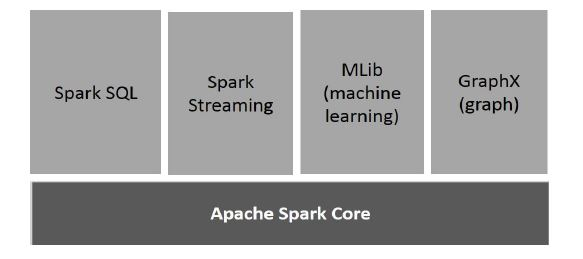

### **Spark SQL VS. PySpark Querying**

Spark SQL brings native support for SQL to Spark and streamlines the process of querying data stored both in RDDs (Spark’s distributed datasets) and in external sources. Spark SQL conveniently blurs the lines between RDDs and relational tables. 



#### **Raw SQL Queries**

In [ ]:
candies = spark.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("candy.csv")

# the above code created a dataframe for us to work on

In the above cell, we read the candies CSV and specify few options, the first is is to maintain the data types of the columns and not convert them all to strings, and the second is to consider the first row as a header.

In [ ]:
candies.createOrReplaceTempView("CandyTable")

`CreateOrReplaceTempView` will create a temporary view of the table on memory it is not presistant at this moment but you can run sql query on top of that.

Now let's write a SQL query to retrieve candies which have more than 50% sugar. 

In [ ]:
myQuery = spark.sql("""
SELECT * FROM CandyTable WHERE sugarpercent>0.5
""")
myQuery.show()

+---+--------------------+---------+------+-------+--------------+------+----------------+----+---+--------+------------+------------+------------------+
| id|      competitorname|chocolate|fruity|caramel|peanutyalmondy|nougat|crispedricewafer|hard|bar|pluribus|sugarpercent|pricepercent|        winpercent|
+---+--------------------+---------+------+-------+--------------+------+----------------+----+---+--------+------------+------------+------------------+
|  0|           100 Grand|      Yes|    No|    Yes|            No|    No|             Yes|  No|Yes|      No|  0.73199999|  0.86000001|         66.971725|
|  1|        3 Musketeers|      Yes|    No|     No|            No|   Yes|              No|  No|Yes|      No|  0.60399997|  0.51099998|         67.602936|
|  2|           Air Heads|       No|   Yes|     No|            No|    No|              No|  No| No|      No|  0.90600002|  0.51099998|         52.341465|
|  4|           Baby Ruth|      Yes|    No|    Yes|           Yes|   Yes|   

In [ ]:
flightData2015 = spark.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("2015-summary.csv")


In [ ]:
flightData2015.createOrReplaceTempView("flight_data_2015")

In [ ]:
flightData2015.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [ ]:
sqlWay = spark.sql("""
SELECT DEST_COUNTRY_NAME, sum(count)
FROM flight_data_2015
GROUP BY DEST_COUNTRY_NAME
""")


sqlWay.show()

+--------------------+----------+
|   DEST_COUNTRY_NAME|sum(count)|
+--------------------+----------+
|            Anguilla|        41|
|              Russia|       176|
|            Paraguay|        60|
|             Senegal|        40|
|              Sweden|       118|
|            Kiribati|        26|
|              Guyana|        64|
|         Philippines|       134|
|            Djibouti|         1|
|            Malaysia|         2|
|           Singapore|         3|
|                Fiji|        24|
|              Turkey|       138|
|                Iraq|         1|
|             Germany|      1468|
|              Jordan|        44|
|               Palau|        30|
|Turks and Caicos ...|       230|
|              France|       935|
|              Greece|        30|
+--------------------+----------+
only showing top 20 rows



#### **PySpark Querying Operation**

An alternative to running raw SQL queries, querying operations can be used for various purposes such as subsetting columns with `select`, adding conditions with `when` and filtering column contents with `like`. Below, some of the most commonly used operations are exemplified.

##### **1.1 Simple Select Operation**

In [ ]:
from pyspark.sql.functions import max
flightData2015.select(max("count")).show()


+----------+
|max(count)|
+----------+
|    370002|
+----------+



It is possible to obtain columns by attribute (sugarpercent) or by indexing (candies['sugarpercent']).

In [ ]:
#Show the first 10 entries in sugarpercent column
candies.select("sugarpercent").show(10)
#Show the first 10 entries in , sugarpercent and winpercent
candies.select("sugarpercent", "winpercent").show(10)

+------------+
|sugarpercent|
+------------+
|  0.73199999|
|  0.60399997|
|  0.90600002|
|       0.465|
|  0.60399997|
|  0.31299999|
|  0.90600002|
|  0.60399997|
|  0.60399997|
|  0.73199999|
+------------+
only showing top 10 rows

+------------+------------------+
|sugarpercent|        winpercent|
+------------+------------------+
|  0.73199999|         66.971725|
|  0.60399997|         67.602936|
|  0.90600002|         52.341465|
|       0.465|         50.347546|
|  0.60399997|         56.914547|
|  0.31299999|         23.417824|
|  0.90600002|38.010963000000004|
|  0.60399997|         34.517681|
|  0.60399997|         38.975037|
|  0.73199999|         36.017628|
+------------+------------------+
only showing top 10 rows



##### **1.2 selectExpr Operations**

There are more complex select expressions that we might use to reterive data. But let's start by the simple steps. In the below code,we start by getting the count, sum, and average of the price percentage, then we rename the  columns. Finally, we select certain cols to display.  

In [ ]:
from pyspark.sql.functions import sum, count, expr

dataframeCandiesNumeric = candies.select(
    count("pricepercent").alias("Price_Percent_Count"),
    sum("pricepercent").alias("Price_Percent_Sum"))
dataframeCandiesNumeric.show()

+-------------------+------------------+
|Price_Percent_Count| Price_Percent_Sum|
+-------------------+------------------+
|                 83|39.227999982000014|
+-------------------+------------------+



Note that we have applied some aggregations on our dataframe too.

There is another function that is called selectExpr that takes expressions which can perform certain computations on the columns, then returns a dataframe. 



In [ ]:
dataframeCandiesNumeric.selectExpr('Price_Percent_Sum / Price_Percent_Count as Price_Percent_Average').show()

+---------------------+
|Price_Percent_Average|
+---------------------+
|   0.4726265058072291|
+---------------------+



##### **2. When Operation**

In the below example, the `sugarpercent` column is selected and a condition is added with a `when` statement

In [ ]:
import pyspark.sql.functions as fn

In [ ]:
candies.select("sugarpercent", fn.when(candies.sugarpercent > 0.5, 
1).otherwise(0)).show(10)

+------------+------------------------------------------------+
|sugarpercent|CASE WHEN (sugarpercent > 0.5) THEN 1 ELSE 0 END|
+------------+------------------------------------------------+
|  0.73199999|                                               1|
|  0.60399997|                                               1|
|  0.90600002|                                               1|
|       0.465|                                               0|
|  0.60399997|                                               1|
|  0.31299999|                                               0|
|  0.90600002|                                               1|
|  0.60399997|                                               1|
|  0.60399997|                                               1|
|  0.73199999|                                               1|
+------------+------------------------------------------------+
only showing top 10 rows



##### **3. Like Operation**

In the brackets of `Like` function, % character is used to filter out all titles having *Haribo* word. If the condition we are looking for is the exact match, then no % character shall be used.

In [ ]:
candies.select("competitorname","sugarpercent", "winpercent",
candies.competitorname.like("%Haribo%")).show()

+--------------------+------------+------------------+----------------------------+
|      competitorname|sugarpercent|        winpercent|competitorname LIKE %Haribo%|
+--------------------+------------+------------------+----------------------------+
|           100 Grand|  0.73199999|         66.971725|                       false|
|        3 Musketeers|  0.60399997|         67.602936|                       false|
|           Air Heads|  0.90600002|         52.341465|                       false|
|          Almond Joy|       0.465|         50.347546|                       false|
|           Baby Ruth|  0.60399997|         56.914547|                       false|
|  Boston Baked Beans|  0.31299999|         23.417824|                       false|
|          Candy Corn|  0.90600002|38.010963000000004|                       false|
|  Caramel Apple Pops|  0.60399997|         34.517681|                       false|
|     Charleston Chew|  0.60399997|         38.975037|                      

##### **4. startswith-endswith Operations**

`startswith` scans from the beginning of word/content with specified criteria in the brackets. In parallel, `endswith` processes the word/content starting from the end. Both of the functions are case sensitive.

In [ ]:
candies.select("competitorname", "sugarpercent", candies.competitorname.startswith("Haribo")).show()
candies.select("competitorname", candies.competitorname.endswith("s")).show()

+--------------------+------------+----------------------------------+
|      competitorname|sugarpercent|startswith(competitorname, Haribo)|
+--------------------+------------+----------------------------------+
|           100 Grand|  0.73199999|                             false|
|        3 Musketeers|  0.60399997|                             false|
|           Air Heads|  0.90600002|                             false|
|          Almond Joy|       0.465|                             false|
|           Baby Ruth|  0.60399997|                             false|
|  Boston Baked Beans|  0.31299999|                             false|
|          Candy Corn|  0.90600002|                             false|
|  Caramel Apple Pops|  0.60399997|                             false|
|     Charleston Chew|  0.60399997|                             false|
|Chewey Lemonhead ...|  0.73199999|                             false|
|            Chiclets|       0.046|                             false|
|     

#### **Defining Your Own Schema in PySpark**

In PySpark you can choose to define your own schema manually. To do that we start by importing some essential librarires.

In [ ]:
from pyspark.sql.types import StructField, StructType, StringType, LongType

myManualSchema = StructType([
  StructField("DEST_COUNTRY_NAME", StringType(), True),
  StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
  StructField("count", LongType(), True)
])
df = spark.read.format("csv").schema(myManualSchema)\
  .load("2015-summary.csv")

After we have defined our schema, let's display the dataframe

In [ ]:
df.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| null|
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United State

#### **Creating Your Own DataFrame**

Just like in Pandas, in PySpark you can creaye your own DataFrame using the Row library, and the `createDataFrame` function.

In [ ]:
from pyspark.sql import Row
from pyspark.sql.types import StructField, StructType, StringType, LongType
myManualSchema = StructType([
  StructField("Destination", StringType(), True),
  StructField("Origin", StringType(), True),
  StructField("Flight ID", LongType(), False)
])
newRows = [
  Row("Egypt", "USA", 5), 
  Row("France", "Germany", 1),
  Row("Poland", "Norway", 7) 
]
parallelizedRows = spark.createDataFrame(newRows, myManualSchema)
parallelizedRows.show()

+-----------+-------+---------+
|Destination| Origin|Flight ID|
+-----------+-------+---------+
|      Egypt|    USA|        5|
|     France|Germany|        1|
|     Poland| Norway|        7|
+-----------+-------+---------+



#### **Challenge 1 - SQL and PySpark Querying**

Write a PySpark code to read all the files in the `by-day` folder, and displays a table that shows the ID of the customer and the the total amount they paid for all their purchases. Make sure to drop any stock that has the word *WATER* in it before calculating the total price.

In [ ]:
#Your answer here

Solve the same question using raw SQL.

In [ ]:
#Your answer here

#### **More SQL Functions in PySpark**

##### **`withColumn()` Function**

Spark `withColumn()` is a DataFrame function that is used to add a new column to DataFrame, change the value of an existing column, convert the datatype of a column, or derive a new column from an existing column.

In [ ]:
staticDataFrame = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load("by-day/*.csv")

staticDataFrame.createOrReplaceTempView("retail_data")
staticSchema = staticDataFrame.schema

In [ ]:
from pyspark.sql.functions import date_format, col
preppedDataFrame = staticDataFrame.withColumn("day_of_week", date_format(col("InvoiceDate"), "EEEE"))
  #The 4 E displays the day of the week
preppedDataFrame.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|day_of_week|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+
|   581214|    23494|VINTAGE DOILY DEL...|      12|2011-12-08 08:32:00|     5.95|   14251.0|United Kingdom|   Thursday|
|   581214|    22969|HOMEMADE JAM SCEN...|      60|2011-12-08 08:32:00|     1.45|   14251.0|United Kingdom|   Thursday|
|   581214|    22910|PAPER CHAIN KIT V...|      40|2011-12-08 08:32:00|     2.55|   14251.0|United Kingdom|   Thursday|
|   581214|    22734|SET OF 6 RIBBONS ...|      12|2011-12-08 08:32:00|     2.89|   14251.0|United Kingdom|   Thursday|
|   581214|    22621|TRADITIONAL KNITT...|      12|2011-12-08 08:32:00|     1.65|   14251.0|United Kingdom|   Thursday|
|   581214|    22144|CHRISTMAS CRAFT L..

##### **Aggregation Functions**

Just like Python, PySpark has some aggregation functions which could be applied to the DataFrame which we have at hand. In the below example the dataframe is grouped by InvoiceNo, and the accoridngly the count of the quantity purchased is counted.

In [ ]:
from pyspark.sql.functions import count
from pyspark.sql.functions import desc
staticDataFrame.groupBy("InvoiceNo").agg(
    count("Quantity")).sort(desc("count(Quantity)")).show()
    

+---------+---------------+
|InvoiceNo|count(Quantity)|
+---------+---------------+
|   581219|            749|
|   581492|            731|
|   581217|            676|
|   581439|            635|
|   581498|            218|
|   581023|            215|
|   581238|            204|
|   581405|            183|
|   581334|            133|
|   581146|            120|
|   581412|            115|
|   581425|             88|
|   581166|             81|
|   581175|             77|
|   581149|             77|
|   581538|             74|
|   581433|             72|
|   581310|             72|
|   581414|             71|
|   581125|             69|
+---------+---------------+
only showing top 20 rows



### **Spark MLib**

A machine learning library built on top of Apache Spark that provides:

*   ML algorithms
*   Featurization: Feature Extraction, Dimensionality Reduction
*   Pipelines: Tools for constructing, evaluating, and tuning ML pipelines
*   Utilities: For handling linear algebra, data handling etc.





##### **StringIndexer**

Some Machine learning models do not work with categories. Therefore, we have to translate the features into numerics. For that, we can utilize the MLlib by PySpark to convert a categorical feature into numeric using the `StringIndexer`. E.g: converting days(Monday, Tuesday...) to numeric representation.

Let's apply the StringIndexer to the `day_of_week` column, and name that new column `day_of_week_index`

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer().setInputCol("day_of_week").setOutputCol("day_of_week_index")

In [ ]:
indexed = indexer.fit(preppedDataFrame).transform(preppedDataFrame)
indexed.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+-----------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|day_of_week|day_of_week_index|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+-----------------+
|   581214|    23494|VINTAGE DOILY DEL...|      12|2011-12-08 08:32:00|     5.95|   14251.0|United Kingdom|   Thursday|              0.0|
|   581214|    22969|HOMEMADE JAM SCEN...|      60|2011-12-08 08:32:00|     1.45|   14251.0|United Kingdom|   Thursday|              0.0|
|   581214|    22910|PAPER CHAIN KIT V...|      40|2011-12-08 08:32:00|     2.55|   14251.0|United Kingdom|   Thursday|              0.0|
|   581214|    22734|SET OF 6 RIBBONS ...|      12|2011-12-08 08:32:00|     2.89|   14251.0|United Kingdom|   Thursday|              0.0|
|   581214|    22621|TRADITIONAL K

##### **VectorAssembler**

What this algorithm does is it takes my features columns that are going to be involved in the machine learning training/testing processes, and merges them all into one column.

In [ ]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler().setInputCols(["UnitPrice", "Quantity"]).setOutputCol("UnitPrice-Quantity")
preppedDataFrame = vectorAssembler.transform(preppedDataFrame)
preppedDataFrame.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+------------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|day_of_week|UnitPrice-Quantity|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-----------+------------------+
|   580538|    23084|  RABBIT NIGHT LIGHT|      48|2011-12-05 08:38:00|     1.79|   14075.0|United Kingdom|     Monday|       [1.79,48.0]|
|   580538|    23077| DOUGHNUT LIP GLOSS |      20|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|     Monday|       [1.25,20.0]|
|   580538|    22906|12 MESSAGE CARDS ...|      24|2011-12-05 08:38:00|     1.65|   14075.0|United Kingdom|     Monday|       [1.65,24.0]|
|   580538|    21914|BLUE HARMONICA IN...|      24|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|     Monday|       [1.25,24.0]|
|   580538|    22467|   GUM

#####**Challenge 2 - Pipeline**

We use Pipeline to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

Applying the following tasks to create your ML pipeline :

1. First, read all the files in the `by-day` folder.
2. Next, create a pipeline using the `Pipeline()` function, in which the indexer is applied followed by the assembler.
3. Afterwards, fit and transform the data at hand using the pipeline we created which includes: StringIndexer and VectorAssembler. 


In [ ]:
# Your answer here

## **References**


*   https://towardsdatascience.com/a-brief-introduction-to-pyspark-ff4284701873
*   https://www.gangboard.com/blog/pyspark-vs-spark#:~:text=PySpark%20is%20an%20API%20developed,programmers%20to%20work%20in%20Spark.&text=Like%20Spark%2C%20PySpark%20helps%20data,to%20work%20on%20Data%20frames.
* https://searchdatamanagement.techtarget.com/definition/Apache-Spark#:~:text=How%20Apache%20Spark%20works,stores%2C%20such%20as%20Apache%20Hive

* https://www.tutorialspoint.com/apache_spark/apache_spark_rdd.htm#:~:text=Resilient%20Distributed%20Datasets%20(RDD)%20is,immutable%20distributed%20collection%20of%20objects.&text=RDDs%20can%20contain%20any%20type,only%2C%20partitioned%20collection%20of%20records.

* https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/#:~:text=Two%20types%20of%20Apache%20Spark,that%20point%20Action%20is%20performed.


* https://medium.com/@aristo_alex/how-apache-sparks-transformations-and-action-works-ceb0d03b00d0

* https://sparkbyexamples.com/pyspark/pyspark-collect/

* https://github.com/jleetutorial/python-spark-tutorial/blob/master/rdd/airports/AirportsInUsaSolution.py

* https://www.tutorialspoint.com/spark_sql/spark_introduction.htm

* https://towardsdatascience.com/pyspark-and-sparksql-basics-6cb4bf967e53

* https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

* https://towardsdatascience.com/your-first-apache-spark-ml-model-d2bb82b599dd

